# EDA

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None

import numpy as np
import os
import sys
sys.path.append('')

# feature_selector is a package for finding and selecting the most useful features in a dataset
# https://github.com/WillKoehrsen/feature-selector
from feature_selector import FeatureSelector

import seaborn as sns
from matplotlib import pyplot as plt
% matplotlib inline

In [4]:
DATA_PATH = "../HomeCreditDefaultRisk/Data"
os.listdir(DATA_PATH)

['installments_payments.csv.zip',
 'previous_application.csv.zip',
 'HomeCredit_columns_description.csv',
 'bureau.csv.zip',
 '.ipynb_checkpoints',
 'bureau_balance.csv.zip',
 'application_train.csv.zip',
 'credit_card_balance.csv.zip',
 'application_test.csv.zip',
 'sample_submission.csv.zip',
 'POS_CASH_balance.csv.zip']

## DATA

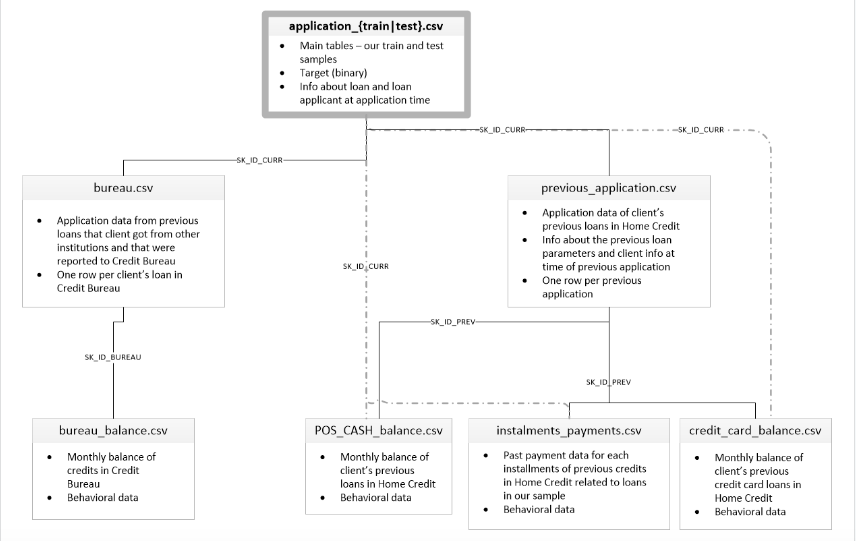

In [7]:
from IPython.display import Image
Image(filename='../HomeCreditDefaultRisk/Home-Credit-Default-Risk/data_shema.19.05.png')

#### IMPORT TABLE

In [8]:
tables = [pd.read_csv(os.path.join(DATA_PATH, table)) for table in os.listdir(DATA_PATH) if table.endswith('csv.zip')]

#### LOOK AT TABLES

In [9]:
ins, prev, bur, bur_ba, app_train, ccb, app_test, samp_ex, pcb = tables

##### installment payments

In [10]:
ins.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


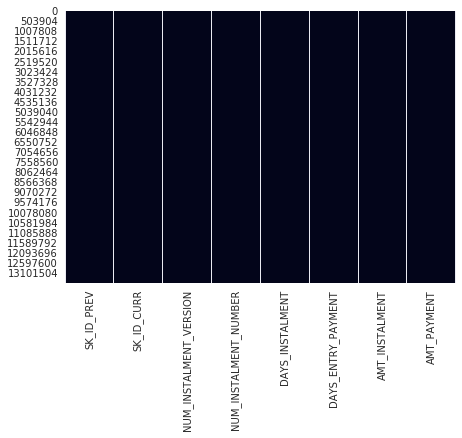

In [11]:
# Missing values
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(ins.isnull(), cbar=False,);

##### previous application

In [12]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


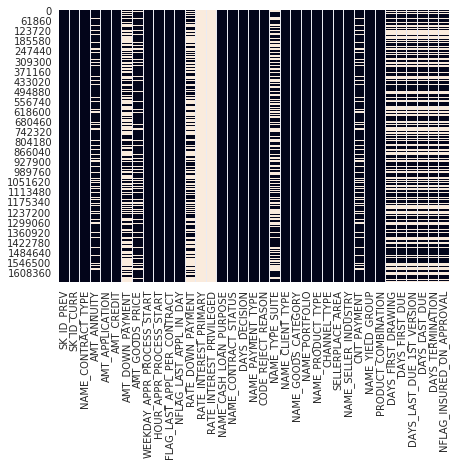

In [13]:
sns.heatmap(prev.isnull(), cbar=False,);

> Many missing values for 2 variables RATE INTEREST PRIMARY & RATE INTEREST PRIVILEGED

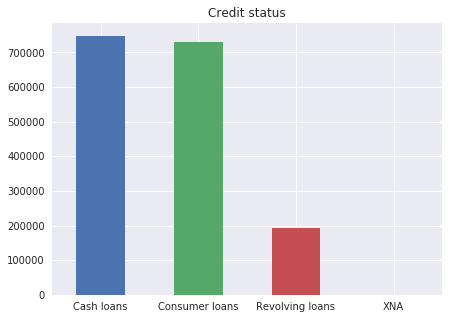

In [14]:
prev.NAME_CONTRACT_TYPE.value_counts().plot(kind='bar', rot=360, title='Credit status');

> It can be interesting to work per kind of CONTRACT

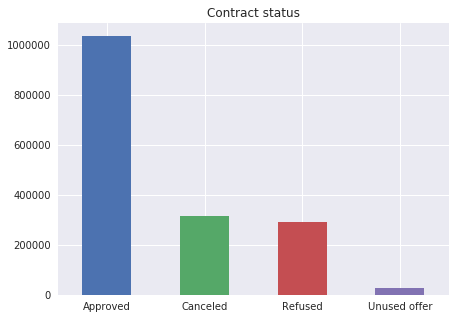

In [15]:
prev.NAME_CONTRACT_STATUS.value_counts().plot(kind='bar', rot=360, title='Contract status');

In [16]:
(prev.NAME_CONTRACT_STATUS.value_counts().to_frame().query("index == 'Refused'") / len(prev)).rename(columns={'NAME_CONTRACT_STATUS':'Share of refused'})

,Share of refused
Refused,0.174036


###### bureau

In [17]:
bur.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


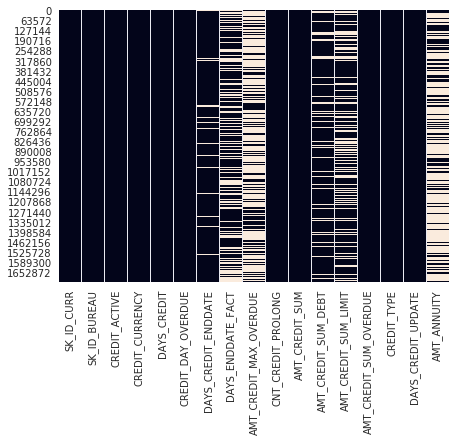

In [18]:
sns.heatmap(bur.isnull(), cbar=False);

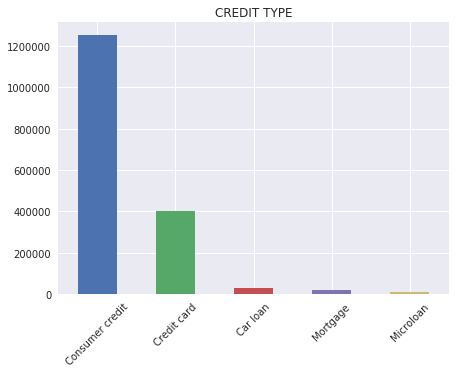

In [19]:
bur.CREDIT_TYPE.value_counts()[:5].plot(kind='bar', rot=45, title='CREDIT TYPE');

> Main of the credit are small consumer credit

###### bureau balance

In [20]:
bur_ba.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


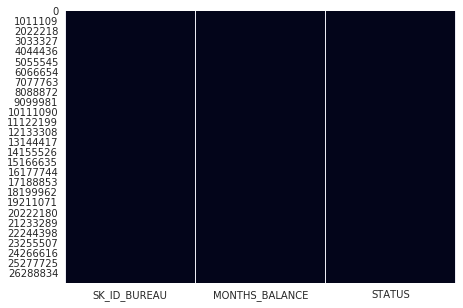

In [21]:
sns.heatmap(bur_ba.isnull(), cbar=False);
# no missing values

##### credit card balance

In [22]:
ccb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


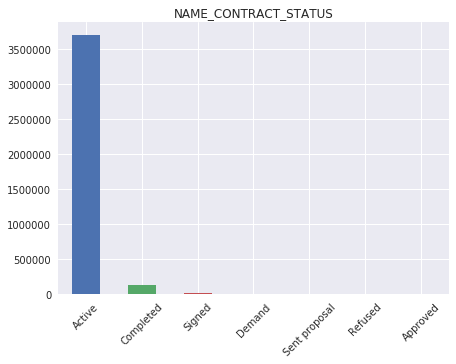

In [23]:
ccb.NAME_CONTRACT_STATUS.value_counts().plot(kind='bar', rot=45, title='NAME_CONTRACT_STATUS');

##### pos cash balance

In [24]:
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


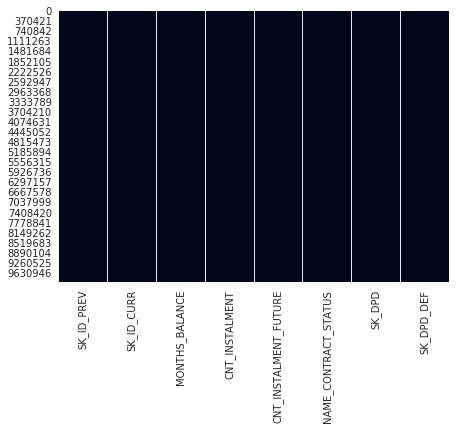

In [25]:
sns.heatmap(pcb.isnull(), cbar=False);
# no missing values

##### application train

In [26]:
sns.set(rc={'figure.figsize':(6,4)})

##### target

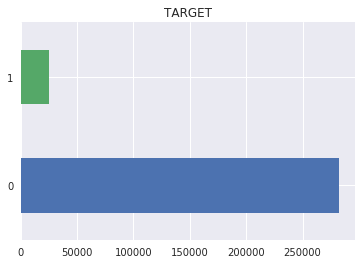

In [27]:
app_train.TARGET.value_counts().plot(kind='barh', title='TARGET');

In [28]:
print(app_train.TARGET.value_counts()[1]/app_train.TARGET.value_counts()[0])

0.08781828601345662


> The target is unbalance, we will have to think about testing some methods like SMOTE or over/under sampling

##### Occupation type

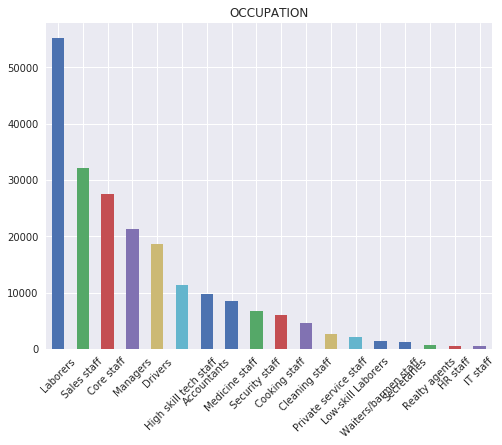

In [29]:
app_train.OCCUPATION_TYPE.value_counts().plot(kind='bar', rot=45, figsize=(8,6), title='OCCUPATION');

##### Look at the amount of credit

mean of amount credit:  599025.9997057016


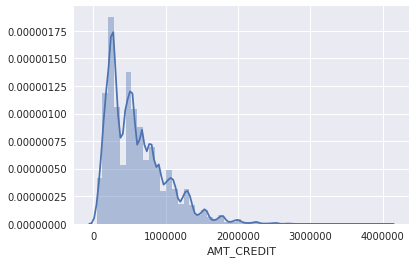

In [30]:
sns.distplot(app_train['AMT_CREDIT'], kde=True);
print("mean of amount credit: ", app_train['AMT_CREDIT'].mean())

#####  annuity

mean of annuity:  27108.573909183444


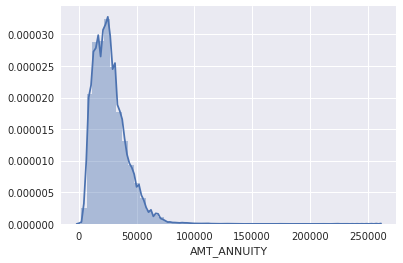

In [31]:
sns.distplot(app_train.loc[app_train.AMT_ANNUITY.notnull()]['AMT_ANNUITY'], kde=True);
print("mean of annuity: ", app_train.loc[app_train.AMT_ANNUITY.notnull()]['AMT_ANNUITY'].mean())

##### days employed

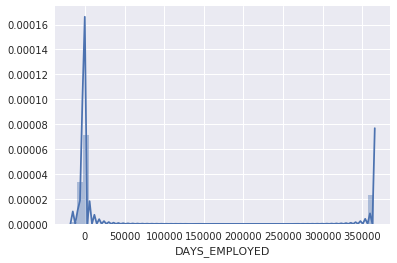

In [32]:
sns.distplot(app_train.loc[app_train.DAYS_EMPLOYED.notnull()]['DAYS_EMPLOYED'], kde=True);

> On the right we see too high number to be realistic (~ 350 000), we will replace it by nan or 1 year

##### Gender

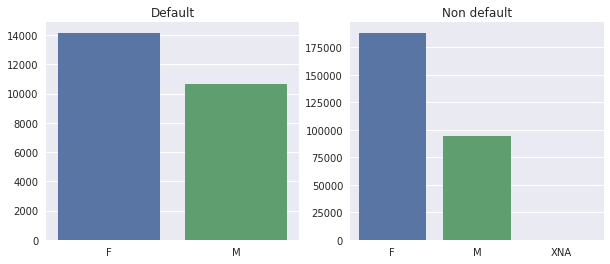

In [33]:
plt.figure(figsize = [10,4])
l1 = app_train.query("TARGET == 1")['CODE_GENDER'].value_counts()
l0 = app_train.query("TARGET == 0")['CODE_GENDER'].value_counts()
plt.subplot(1,2,1)
sns.barplot(x = l1.index, y=l1.values)
plt.title("Default")
plt.xticks(rotation=0)
plt.subplot(1,2,2)
sns.barplot(x = l0.index, y=l0.values)
plt.title("Non default")
plt.xticks(rotation=0)
plt.show()

> We observe proportion of men higher in the default population

##### Ext source

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/ec2-user/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/ec2-user/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


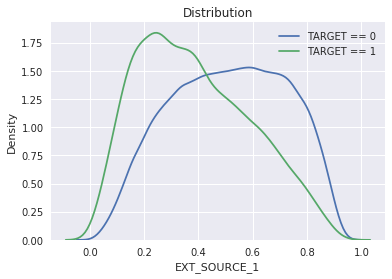

In [34]:
sns.kdeplot(app_train.ix[app_train['TARGET'] == 0, 'EXT_SOURCE_1'], label = 'TARGET == 0')
sns.kdeplot(app_train.ix[app_train['TARGET'] == 1, 'EXT_SOURCE_1'], label = 'TARGET == 1')
# label the plot
plt.xlabel('EXT_SOURCE_1'); plt.ylabel('Density'); plt.title('Distribution')
plt.legend();

/home/ec2-user/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/ec2-user/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


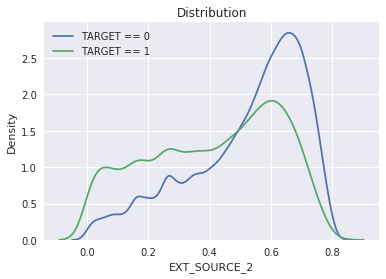

In [35]:
sns.kdeplot(app_train.ix[app_train['TARGET'] == 0, 'EXT_SOURCE_2'], label = 'TARGET == 0')
sns.kdeplot(app_train.ix[app_train['TARGET'] == 1, 'EXT_SOURCE_2'], label = 'TARGET == 1')
# label the plot
plt.xlabel('EXT_SOURCE_2'); plt.ylabel('Density'); plt.title('Distribution')
plt.legend();

/home/ec2-user/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/ec2-user/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


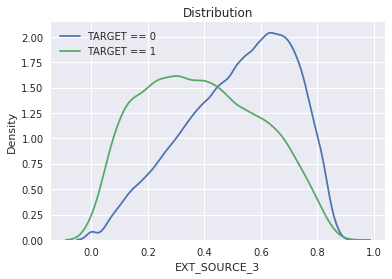

In [36]:
sns.kdeplot(app_train.ix[app_train['TARGET'] == 0, 'EXT_SOURCE_3'], label = 'TARGET == 0')
sns.kdeplot(app_train.ix[app_train['TARGET'] == 1, 'EXT_SOURCE_3'], label = 'TARGET == 1')
# label the plot
plt.xlabel('EXT_SOURCE_3'); plt.ylabel('Density'); plt.title('Distribution')
plt.legend();

> They are highly corrolated with the target

##### Do we have difference between train and test ?

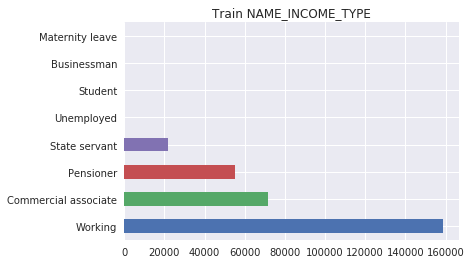

In [37]:
app_train.NAME_INCOME_TYPE.value_counts().plot('barh', title="Train NAME_INCOME_TYPE");

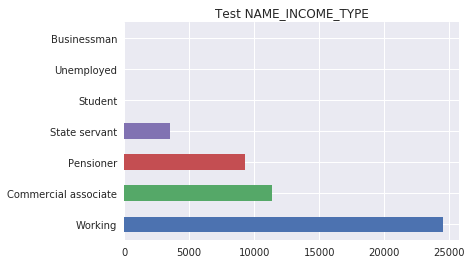

In [38]:
app_test.NAME_INCOME_TYPE.value_counts().plot('barh', title="Test NAME_INCOME_TYPE");

> No many differences <br>
> Except : we can delete maternity leave rows"

#### Correlation
###### Using feature_selector package

In [39]:
# Features are in train and labels are in train_labels
train=app_train.drop('TARGET',axis=1)
fs = FeatureSelector(data = train, labels = app_train.TARGET)

20 features with a correlation magnitude greater than 0.98.



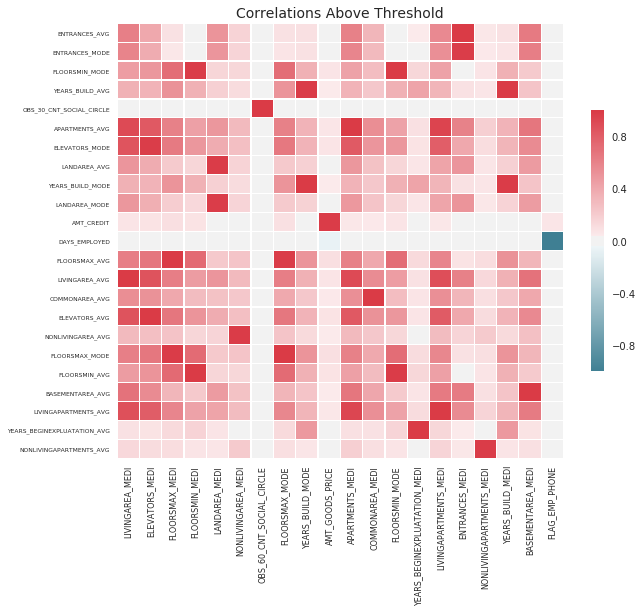

In [40]:
# Plot feature with a specified corrolation threshold
fs.identify_collinear(correlation_threshold = 0.98)
fs.plot_collinear()

In [41]:
# list of highly collinear features to remove
collinear_features = fs.ops['collinear']

# dataframe of collinear features
fs.record_collinear

,corr_feature,corr_value,drop_feature
0,AMT_CREDIT,0.986968,AMT_GOODS_PRICE
1,DAYS_EMPLOYED,-0.999755,FLAG_EMP_PHONE
2,YEARS_BUILD_AVG,0.989444,YEARS_BUILD_MODE
3,FLOORSMAX_AVG,0.985689,FLOORSMAX_MODE
4,FLOORSMIN_AVG,0.985875,FLOORSMIN_MODE
5,APARTMENTS_AVG,0.995081,APARTMENTS_MEDI
6,BASEMENTAREA_AVG,0.994317,BASEMENTAREA_MEDI
7,YEARS_BEGINEXPLUATATION_AVG,0.993825,YEARS_BEGINEXPLUATATION_MEDI
8,YEARS_BUILD_AVG,0.998495,YEARS_BUILD_MEDI
9,YEARS_BUILD_MODE,0.989463,YEARS_BUILD_MEDI


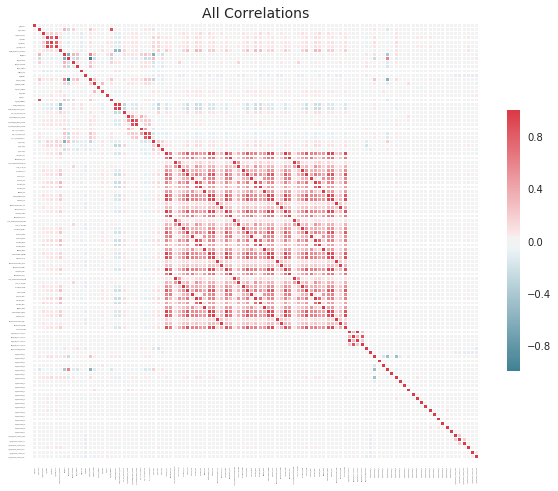

In [42]:
fs.plot_collinear(plot_all = True)

In [43]:
# Run a lightGBM
fs.identify_zero_importance(task = 'classification',
                            eval_metric = 'auc',
                            n_iterations = 10,
                            early_stopping = True)

# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[346]	valid_0's auc: 0.758473
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[284]	valid_0's auc: 0.760464
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[294]	valid_0's auc: 0.759247
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[209]	valid_0's auc: 0.757852
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[269]	valid_0's auc: 0.758035
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[301]	valid_0's auc: 0.772345
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[310]	valid_0's auc: 0.759291
Training until validation scores don't improve for 100 rounds.
Early s

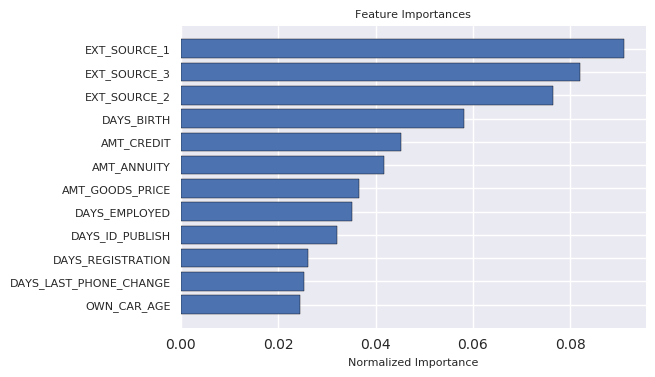

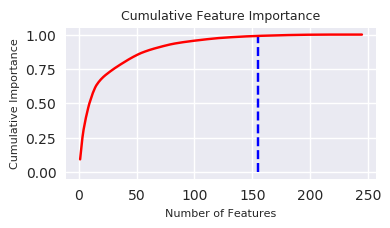

155 features required for 0.99 of cumulative importance


In [44]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [45]:
# Single Unique Value Features
fs.identify_single_unique()

0 features with a single unique value.



In [46]:
# Remove the features from all methods (returns a df)
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['collinear', 'zero_importance', 'single_unique'] methods have been run

Removed 169 features including one-hot features.


In [47]:
# Columns to keep
train_removed_all.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG'